In [1]:
import proposal as pp
import numpy as np
from tqdm import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from helper_functions_multi import get_angle_deviation
import os

In [14]:
n_events = 2000 # total measured events in akimenko
    
deflection = [
    'bremsginneken', # 'bremstsaiapproximation', 
    'ioniznaive',
    'photoginneken', # 'photoborogpetrukhin',
    'epairginneken'] ### same as default
    
e_cut = 500
v_cut = 0.05 
cont_rand = False
scattering_method = "moliere" # "highland"
  
# table_path = "/Users/pascalgutjahr/.cache/PROPOSAL" # macbook pro
table_path = "/net/nfshome/home/pgutjahr/.cache/PROPOSAL" # vollmond
    
rnd_seed = 71530

interpol_nodes = 200

initial_direction = [0, 0, 1]

beta_brems = 1.0
beta_ioniz = 1.0
beta_epair = 1.0
beta_multiplescatter = 1.0
beta_photonuclear = 1.0

max_dist = 1e9 # in cm

In [15]:
pp.InterpolationSettings.tables_path = table_path   # version 7
    
pp.InterpolationSettings.nodes_dndx_e = interpol_nodes
pp.InterpolationSettings.nodes_dndx_v = interpol_nodes

pp.RandomGenerator.get().set_seed(rnd_seed)
args = {
        "particle_def": pp.particle.MuMinusDef(),
        "target": pp.medium.Ice(),
        "interpolate": True,
        "cuts": pp.EnergyCutSettings(e_cut, v_cut, cont_rand)
        }

cross = pp.crosssection.make_std_crosssection(**args)
multiple_scatter = pp.make_multiple_scattering(scattering_method, args["particle_def"], args["target"], cross, True)

stochastic_deflect = []
for d in deflection:
    stochastic_deflect.append(pp.make_stochastic_deflection(d, 
    args["particle_def"], args["target"]))


collection = pp.PropagationUtilityCollection()
collection.displacement = pp.make_displacement(cross, True)
collection.interaction = pp.make_interaction(cross, True)
collection.time = pp.make_time(cross, args["particle_def"], True)
collection.decay = pp.make_decay(cross, args["particle_def"], True)


# collection.scattering = pp.scattering.ScatteringMultiplier(multiple_scatter, beta_multiplescatter)
# '''
collection.scattering = pp.scattering.ScatteringMultiplier(
    multiple_scatter, 
    stochastic_deflect, 
    beta_multiplescatter, 
    [(pp.particle.Interaction_Type.brems, beta_brems), (pp.particle.Interaction_Type.ioniz, beta_ioniz), 
    (pp.particle.Interaction_Type.epair, beta_epair), (pp.particle.Interaction_Type.photonuclear, beta_photonuclear)])
# '''

utility = pp.PropagationUtility(collection = collection)
detector = pp.geometry.Sphere(pp.Cartesian3D(0,0,0), 1e20) # version 7
density_distr = pp.density_distribution.density_homogeneous(args["target"].mass_density)


prop = pp.Propagator(args["particle_def"], [(detector, utility, density_distr)])

init_state = pp.particle.ParticleState()
init_state.position = pp.Cartesian3D(0, 0, 0) # version 7
init_state.direction = pp.Cartesian3D(initial_direction[0], initial_direction[1], initial_direction[2]) # version 7

# 10 TeV to 500 GeV

In [33]:
E_i = 1e7 # in MeV, 10 TeV
E_f = 5e5 # 500 GeV 

tracks = []
deflections_01 = [] # in deg
for i in tqdm(range(n_events)):
    init_state.energy = E_i # initial energy in MeV
    track = prop.propagate(init_state, max_distance = max_dist, min_energy = E_f) # max_dist=1e9    
    tracks.append(track)
    if track.track_energies()[-1] >= E_f * 0.9:
        deflection = get_angle_deviation(track.track_directions()[0].spherical_coordinates[1], track.track_directions()[0].spherical_coordinates[2], track.track_directions()[-1].spherical_coordinates[1], track.track_directions()[-1].spherical_coordinates[2])
        deflections_01.append(np.rad2deg(deflection))

100%|██████████| 2000/2000 [00:45<00:00, 43.60it/s]


# 1 PeV to 500 GeV

In [34]:
E_i = 1e9 # in MeV, 1 PeV
E_f = 5e5 # 500 GeV 

tracks = []
deflections_02 = [] # in deg
for i in tqdm(range(n_events)):
    init_state.energy = E_i # initial energy in MeV
    track = prop.propagate(init_state, max_distance = max_dist, min_energy = E_f) # max_dist=1e9    
    tracks.append(track)
    if track.track_energies()[-1] >= E_f * 0.9:
        deflection = get_angle_deviation(track.track_directions()[0].spherical_coordinates[1], track.track_directions()[0].spherical_coordinates[2], track.track_directions()[-1].spherical_coordinates[1], track.track_directions()[-1].spherical_coordinates[2])
        deflections_02.append(np.rad2deg(deflection))

100%|██████████| 2000/2000 [05:14<00:00,  6.37it/s]


# 1 TeV to 500 GeV

In [35]:
E_i = 1e6 # in MeV, 1 TeV
E_f = 5e5 # 500 GeV 

tracks = []
deflections_03 = [] # in deg
for i in tqdm(range(n_events)):
    init_state.energy = E_i # initial energy in MeV
    track = prop.propagate(init_state, max_distance = max_dist, min_energy = E_f) # max_dist=1e9    
    tracks.append(track)
    if track.track_energies()[-1] >= E_f * 0.9:
        deflection = get_angle_deviation(track.track_directions()[0].spherical_coordinates[1], track.track_directions()[0].spherical_coordinates[2], track.track_directions()[-1].spherical_coordinates[1], track.track_directions()[-1].spherical_coordinates[2])
        deflections_03.append(np.rad2deg(deflection))

100%|██████████| 2000/2000 [00:05<00:00, 386.15it/s]


# 10 PeV to 500 GeV

In [36]:
E_i = 1e10 # in MeV, 10 PeV
E_f = 5e5 # 500 GeV 

tracks = []
deflections_04 = [] # in deg
for i in tqdm(range(n_events)):
    init_state.energy = E_i # initial energy in MeV
    track = prop.propagate(init_state, max_distance = max_dist, min_energy = E_f) # max_dist=1e9    
    tracks.append(track)
    if track.track_energies()[-1] >= E_f * 0.9:    
        deflection = get_angle_deviation(track.track_directions()[0].spherical_coordinates[1], track.track_directions()[0].spherical_coordinates[2], track.track_directions()[-1].spherical_coordinates[1], track.track_directions()[-1].spherical_coordinates[2])
        deflections_04.append(np.rad2deg(deflection))

100%|██████████| 2000/2000 [09:13<00:00,  3.61it/s]


# Plot

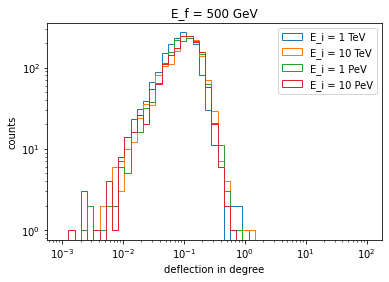

In [37]:
bins = np.logspace(-3, 2, 50)
plt.hist(deflections_03, bins=bins, histtype='step', label='E_i = 1 TeV')
plt.hist(deflections_01, bins=bins, histtype='step', label='E_i = 10 TeV')
plt.hist(deflections_02, bins=bins, histtype='step', label='E_i = 1 PeV')
plt.hist(deflections_04, bins=bins, histtype='step', label='E_i = 10 PeV')
plt.xscale('log')
plt.yscale('log')
plt.title('E_f = 500 GeV')
plt.xlabel('deflection in degree')
plt.ylabel('counts')
plt.legend()

In [38]:
print(np.median(deflections_01))
print(np.median(deflections_02))
print(np.median(deflections_03))
print(np.median(deflections_04))

0.103361313104065302725
0.09928121937656749292
0.08554634195330886852
0.10006753744439154658
